In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot




Загружаем библиотеки и подгружаем очищенный набор данных.

In [8]:
df = pd.read_csv('vgsales_2.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,12200,Cabela's Big Game Hunter 2005 Adventures,GC,2004.0,Sports,Activision,0.05,0.01,0.00,0.00,0.07
1,10814,Minority Report: Everybody Runs,XB,2002.0,Action,Activision,0.07,0.02,0.00,0.00,0.10
2,894,Mario Super Sluggers,Wii,2008.0,Sports,Nintendo,1.51,0.00,0.29,0.12,1.93
3,4808,Warriors Orochi 2 (JP sales),PS2,2008.0,Action,Tecmo Koei,0.00,0.00,0.40,0.00,0.40
4,13925,Don Bradman Cricket 14,XOne,2015.0,Sports,Tru Blu Entertainment,0.00,0.04,0.00,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...
548,4143,SimCity Creator,Wii,2008.0,Simulation,Electronic Arts,0.37,0.03,0.04,0.04,0.48
549,14462,Freaky Flyers,XB,2003.0,Racing,Midway Games,0.02,0.01,0.00,0.00,0.03
550,7513,Frogger 3D,3DS,2011.0,Action,Konami Digital Entertainment,0.16,0.03,0.00,0.01,0.20
551,872,Tom Clancy's Rainbow Six: Vegas,X360,2006.0,Shooter,Ubisoft,1.09,0.65,0.02,0.20,1.96


countplot() воспроизводит график, демонстрирующий количество наблюдений в наборе данных в каждой категориальной ячейке с помощью столбцов.

На графике ниже можно сказать, что наибольшее количество игр было выпущено на DS и PS2, третьими были PS. На последним месте WiiU и DC.

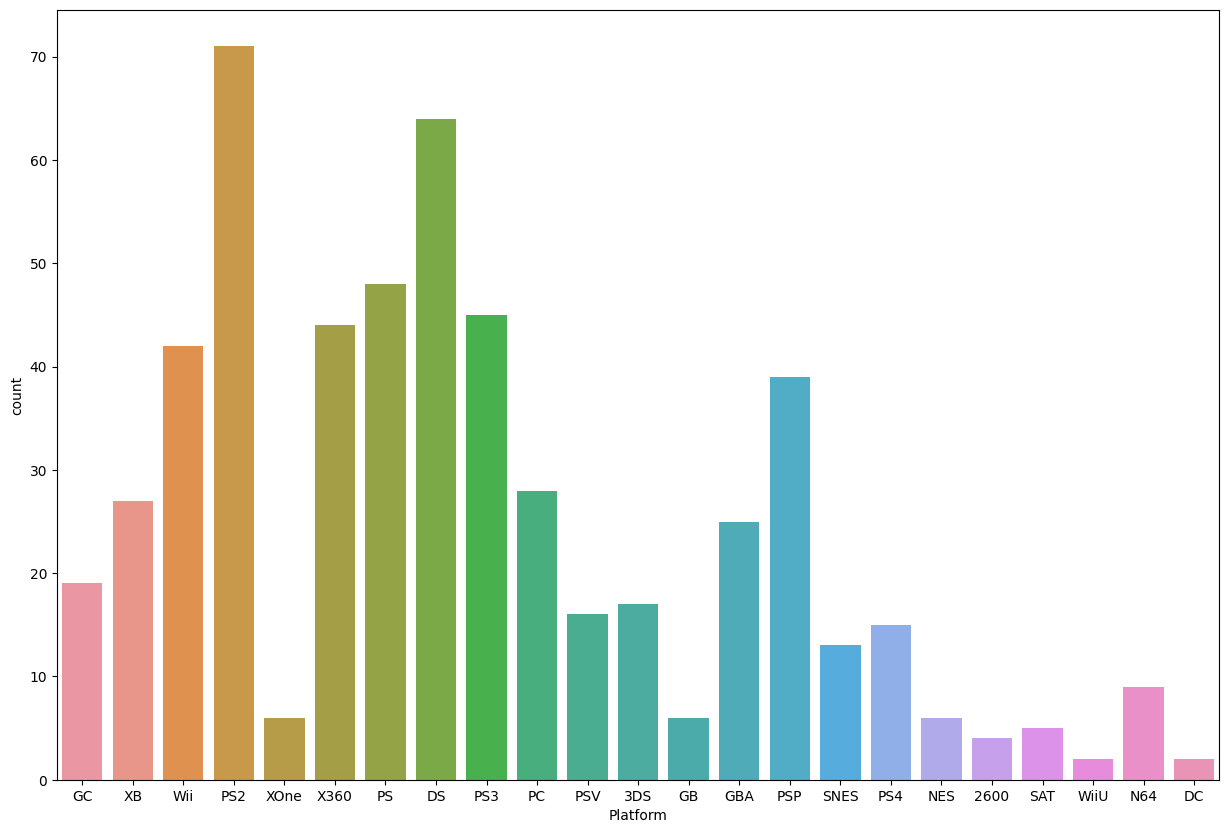

In [9]:
graph = sns.countplot(x="Platform", data = df)
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

barplot() сопостовляет данные по значениям категориальной переменной и применяет определённую функцию к значениям соответсвующих групп цифровой переменной. По умолчанию эта функция — среднее.

На графике ниже наибольшее количество мировых продаж видеоигр приходится на GB , второй идёт NES , третьей X360. Плафтормой с наименьшими продажами является PSV и DC.


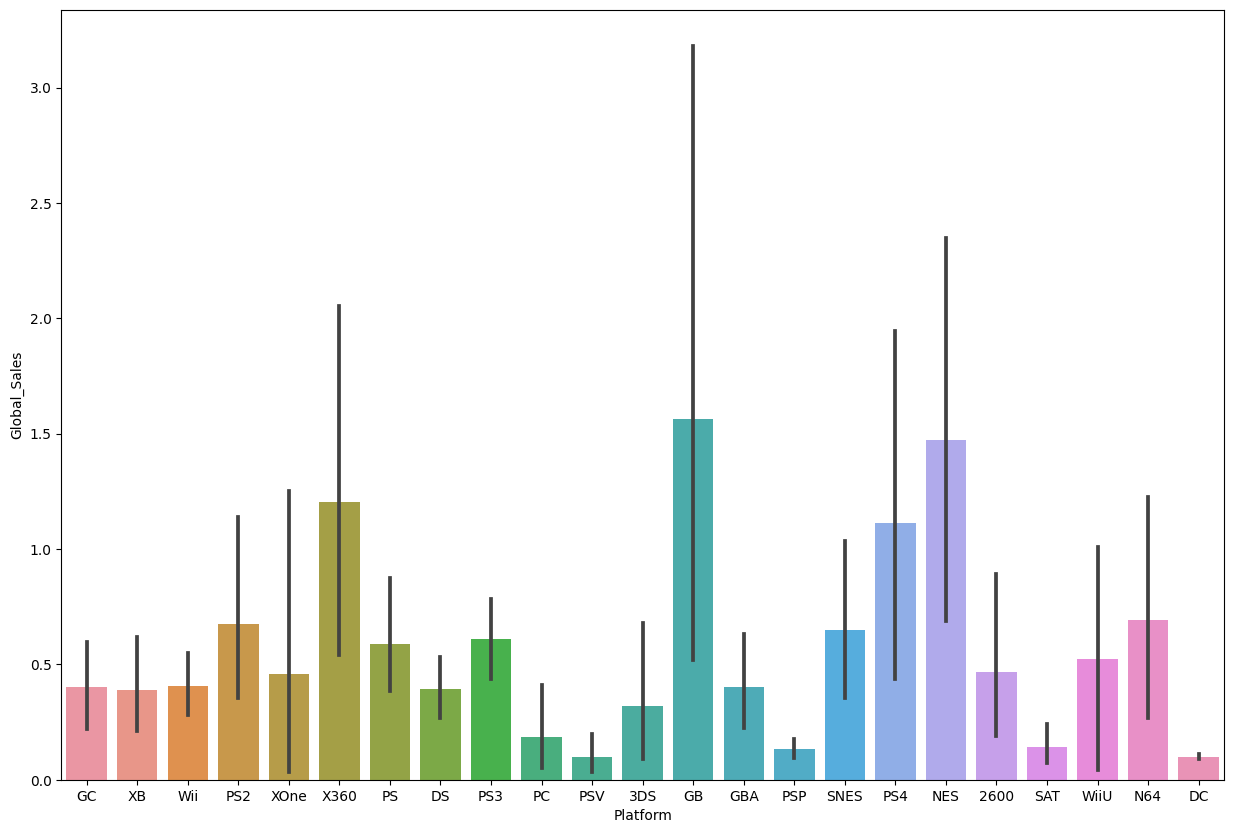

In [10]:
graph = sns.barplot(x=df["Platform"], y=df["Global_Sales"])
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

boxplot() — ящик с усами или диаграмма размаха. Такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.

По графику можно наблюдать, что самыми продаваемыми играми по жанру являются шутеры (Action), вторым идут платформеры (Racing), третьими идут шутеры (Role-Playing). Самым непопулярным жанром являются стратегии (Strategy).


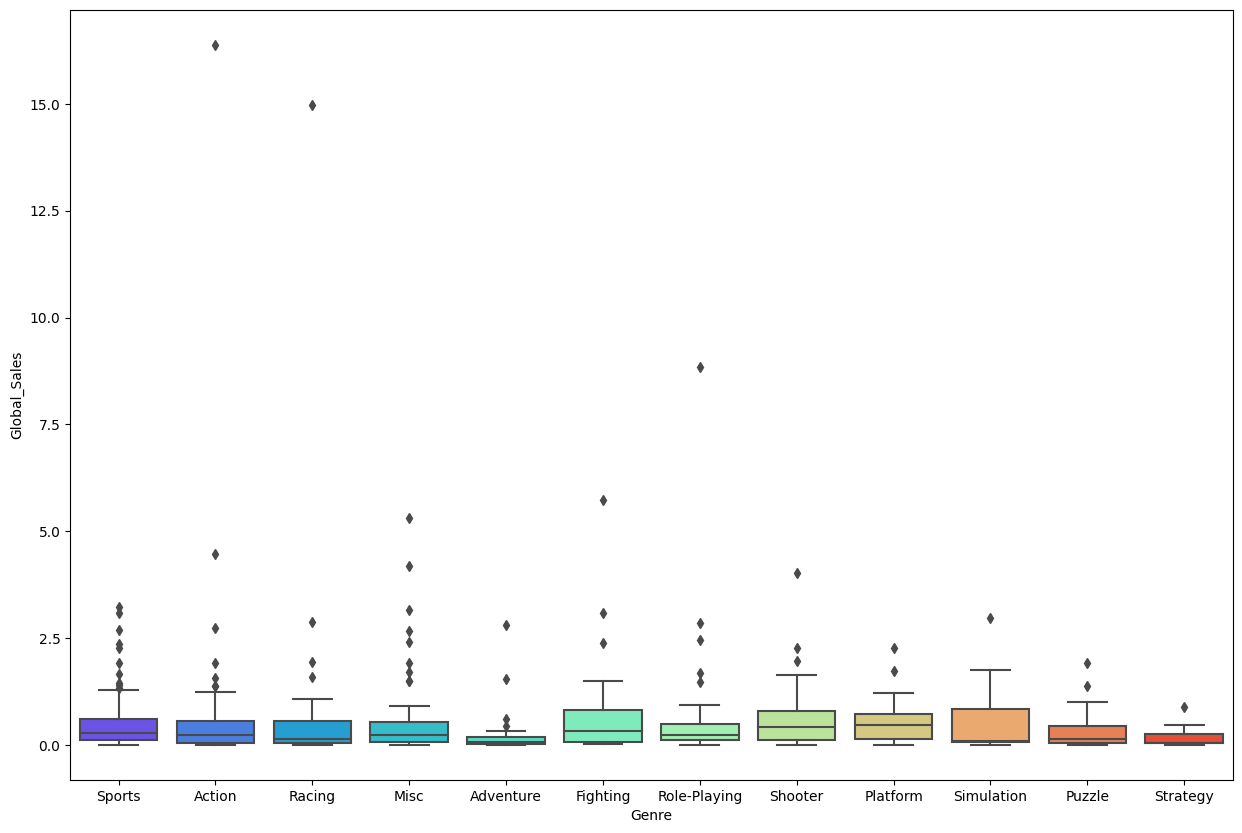

In [11]:
graph = sns.boxplot(x="Genre", y="Global_Sales",data = df,palette='rainbow')
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

Тепловая карта (heatmap()) - это метод визуализации данных, который показывает величину явления в виде цвета в двух измерениях.

Диаграмма ниже предназначена для температурных данных. В данной сфере она не совсем корректна. Но если описать то зависимость между числами Rank и Global_Sales минимальна из интервала.

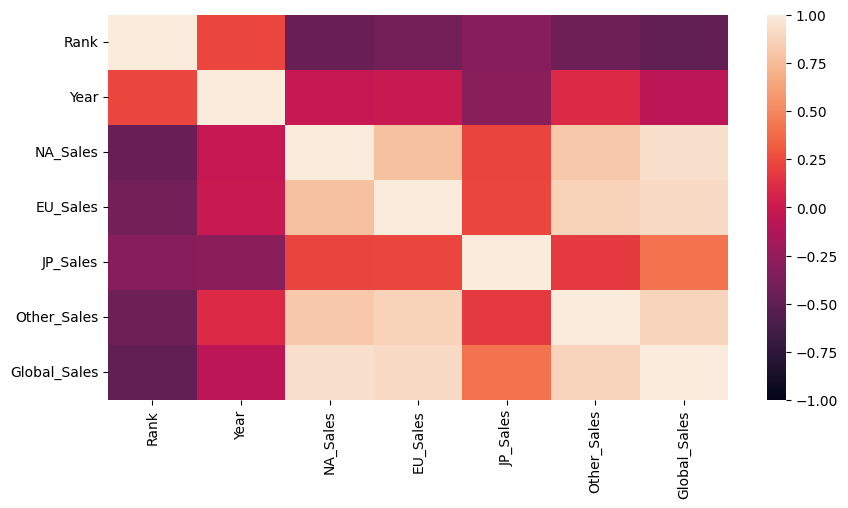

In [13]:
MyHeatMap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1)
MyHeatMap.figure.set_figwidth(10)
MyHeatMap.figure.set_figheight(5)

pairplot() - построение попарных взаимосвязей в наборе данных.

В диаграмме ниже представлено сравнение всех числовых столбцов между собой.

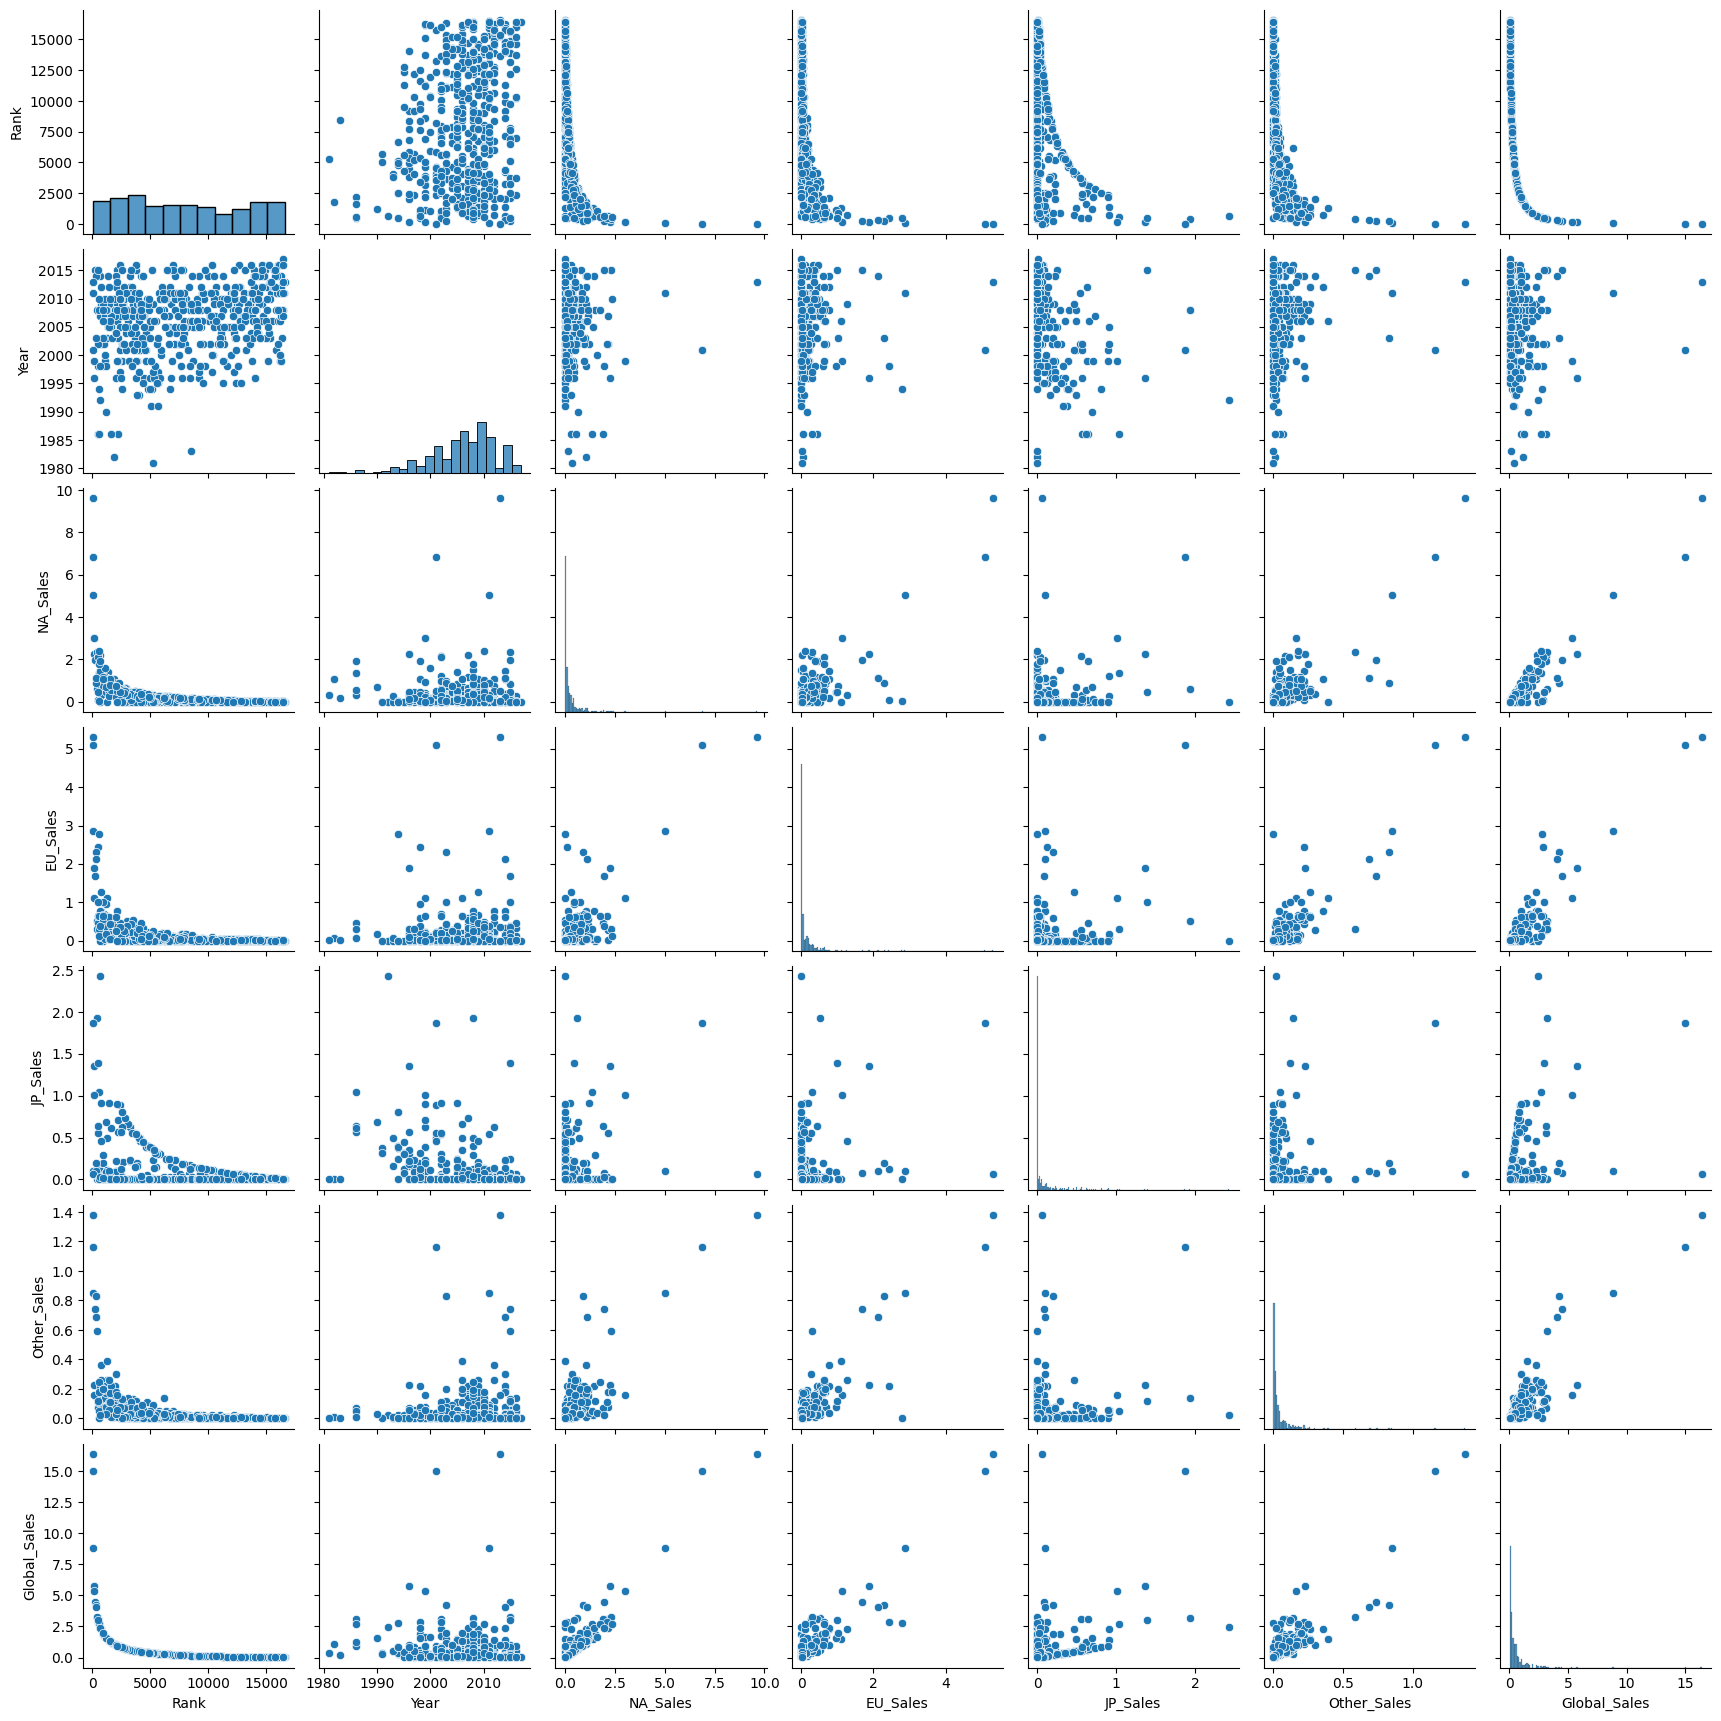

In [14]:
graph = sns.pairplot(df)

Кластеризация — задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию.

Ниже идет выбор столбцов и выводятся значения, кратные 50.

In [16]:
df_mini = df[["NA_Sales","EU_Sales","JP_Sales"]][::50]
df_mini

,NA_Sales,EU_Sales,JP_Sales
0,0.05,0.01,0.00
50,0.21,0.15,0.00
100,0.00,0.00,2.43
150,0.43,0.34,0.00
200,0.35,0.07,0.00
250,0.18,0.00,0.00
300,0.11,0.08,0.00
350,0.00,0.00,0.07
400,0.33,0.23,0.00
450,0.00,0.00,0.03


Выбираем количество кластеров, после проводим моделирование. С помощью метода predict выводим точки и записываем их в отдельный столбец. 

In [18]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

model.fit(df_mini)

all_predictions = model.predict(df_mini)

df_mini["KMeans"] = all_predictions

df_mini

c:\Users\makso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,NA_Sales,EU_Sales,JP_Sales,KMeans
0,0.05,0.01,0.00,1
50,0.21,0.15,0.00,1
100,0.00,0.00,2.43,0
150,0.43,0.34,0.00,1
200,0.35,0.07,0.00,1
250,0.18,0.00,0.00,1
300,0.11,0.08,0.00,1
350,0.00,0.00,0.07,1
400,0.33,0.23,0.00,1
450,0.00,0.00,0.03,1


Вывод KMeans в диграмме, которая показывает количество.

<Axes: xlabel='count', ylabel='KMeans'>

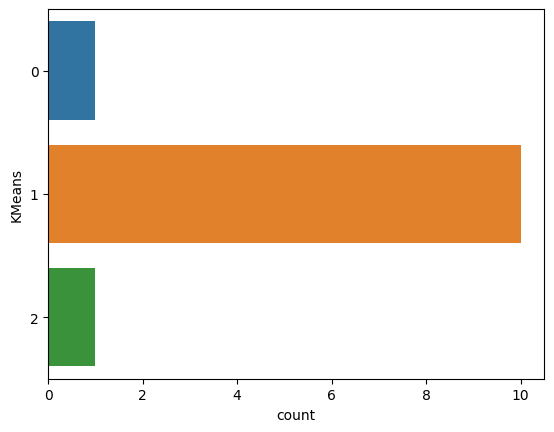

In [19]:
sns.countplot(data = df_mini, y = "KMeans")

Вывод Kmeans на pairplot диаграмме, которая отображает подмножества из нового столбца в тех столбцах, которые указаны в параметре.

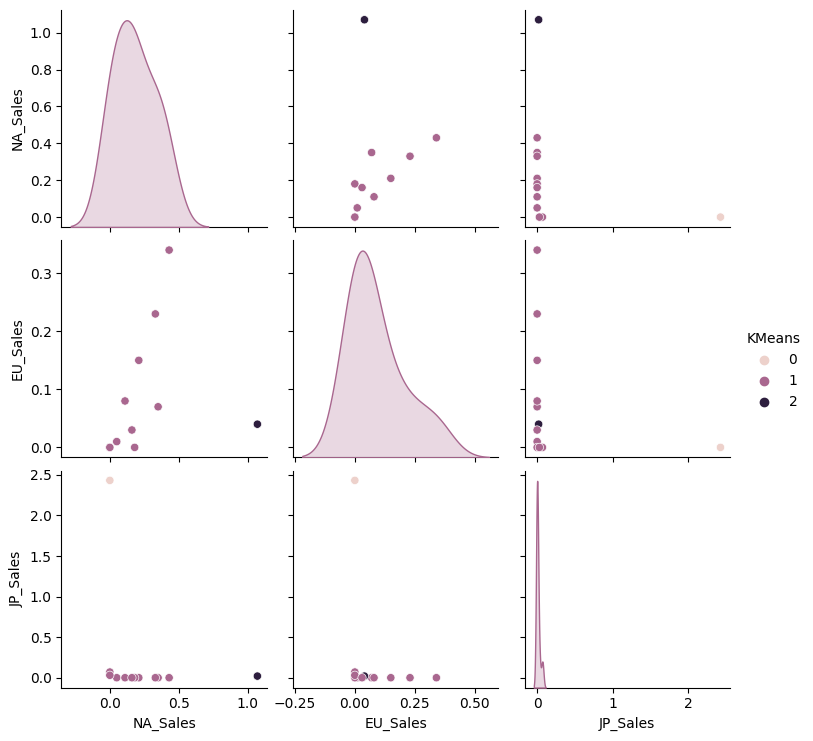

In [20]:
sns.pairplot(df_mini,hue="KMeans")

PairGrid() - сетка подзаголовков для построения попарных взаимосвязей в наборе данных.

Диаграмма идентична pairplot(), однако есть различие: а именно - круги.

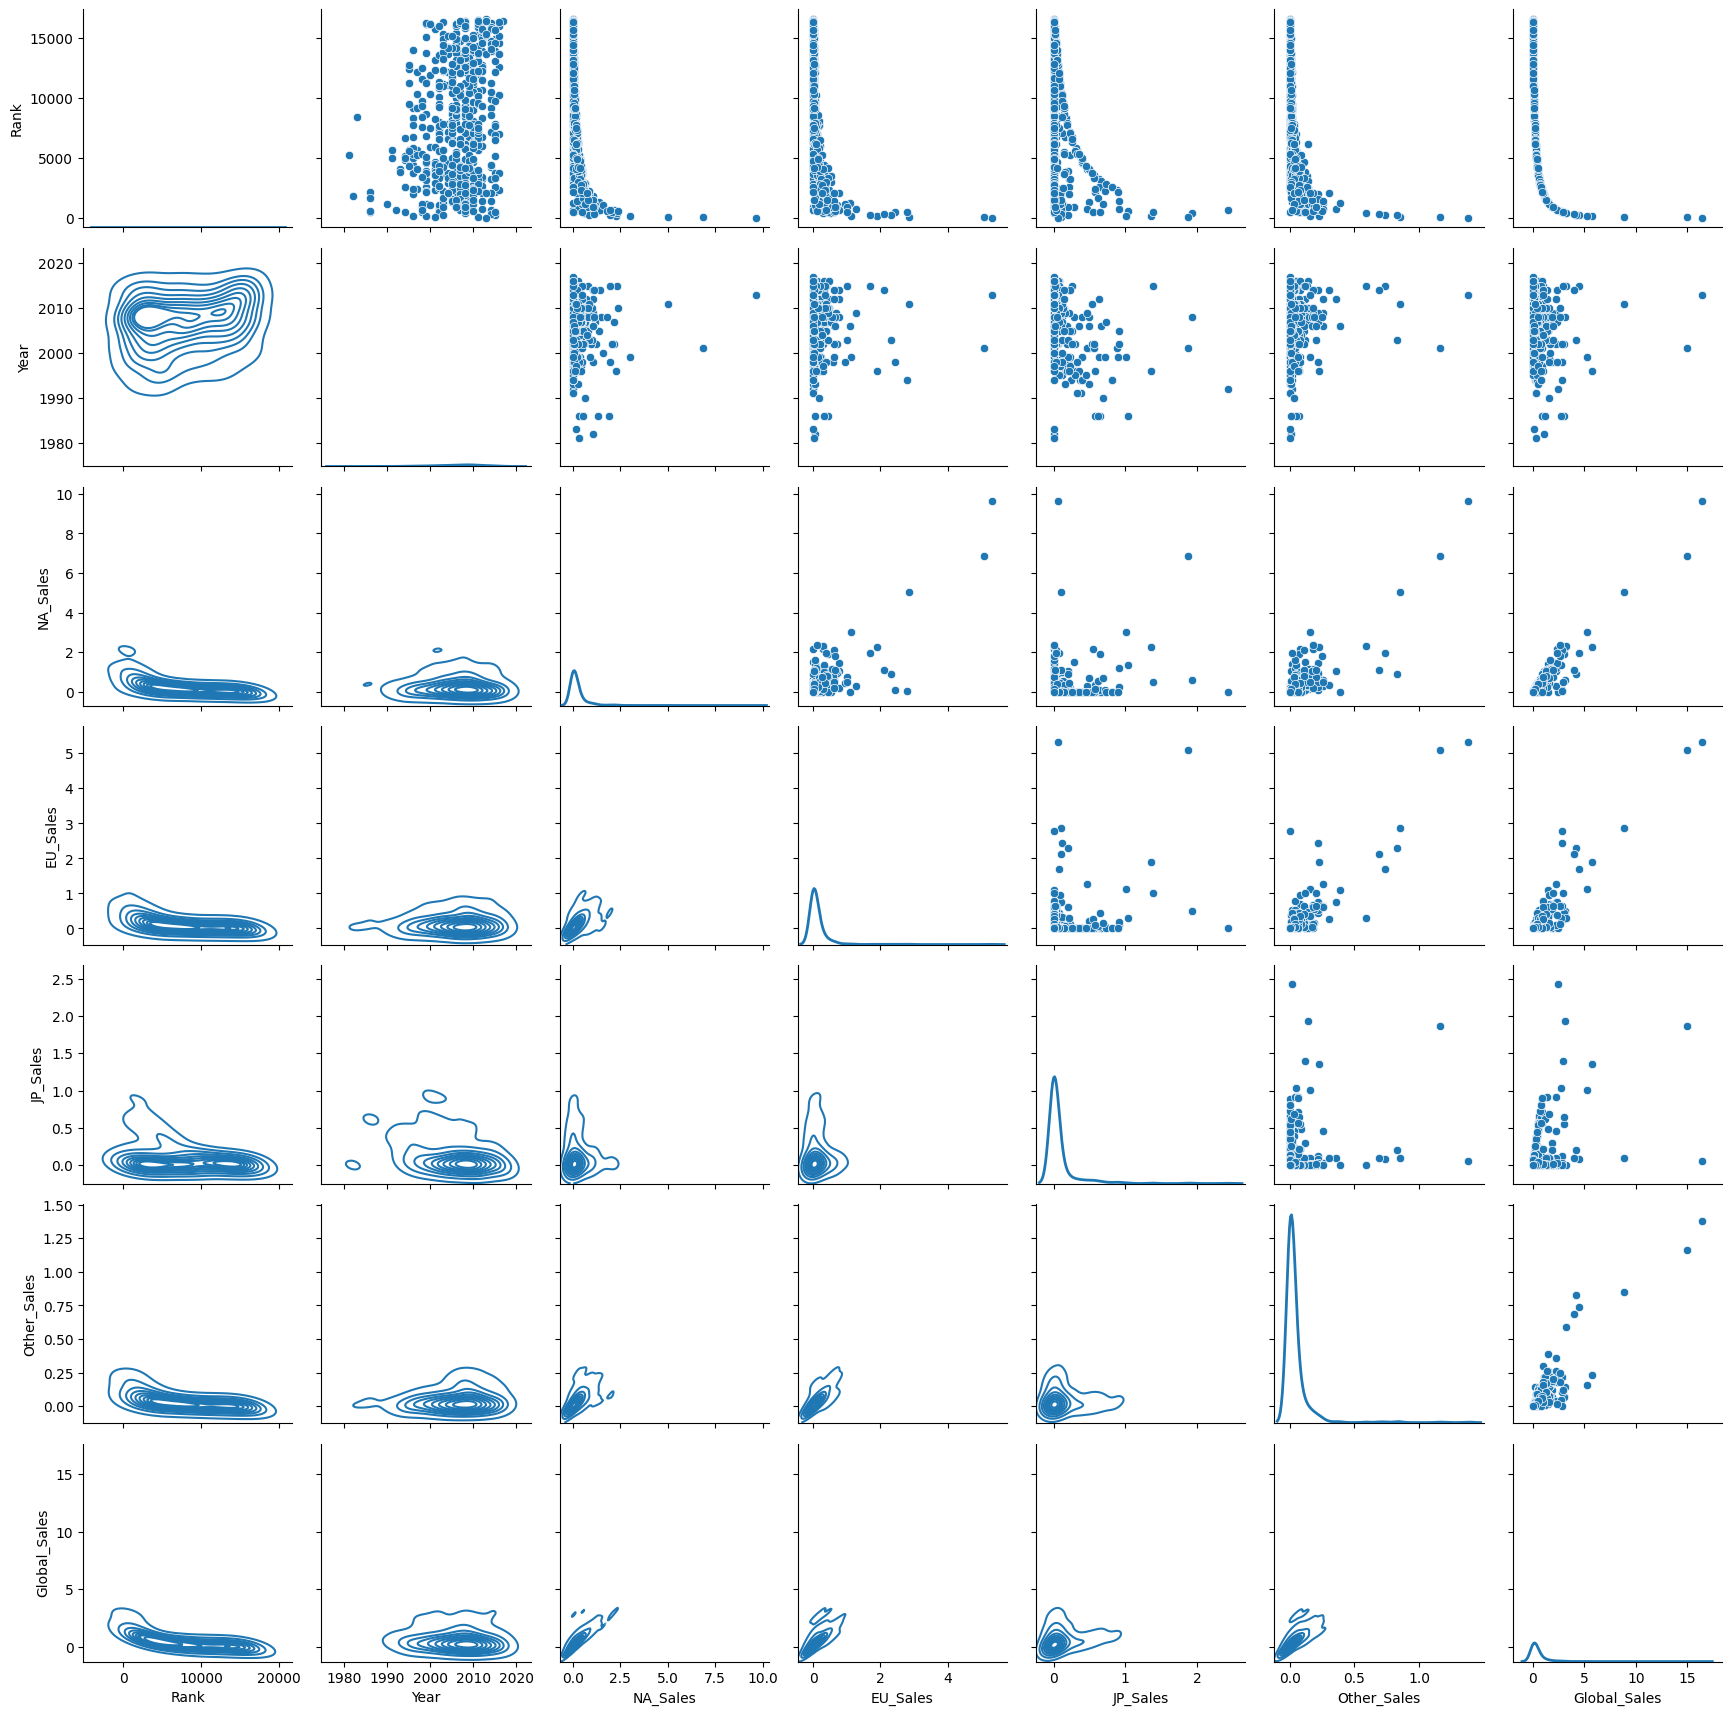

In [17]:
graph = sns.PairGrid(df)
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
graph = graph.map_diag(sns.kdeplot, lw = 2)